In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 81.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 29.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 94.1 MB/s eta 0:00:00


In [ ]:
!git clone https://github.com/IndoNLP/indonlu.git
%cd indonlu/
!pip install -r examples/requirements.txt

Cloning into 'indonlu'...
remote: Enumerating objects: 500, done.
remote: Counting objects: 100% (184/184), done.
remote: Compressing objects: 100% (73/73), done.
remote: Total 500 (delta 115), reused 142 (delta 111), pack-reused 316
Receiving objects: 100% (500/500), 9.45 MiB | 8.59 MiB/s, done.
Resolving deltas: 100% (235/235), done.
/content/indonlu
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 47.4 MB/s eta 0:00:00
  Created wheel for sklearn: filename=sklearn-0.0.post5-py3-none-any.whl size=2950 sha256=b6162a0c96902c1d583dac092eb7c4c51e24e61ec8068da3edc442102f4168bb
  Stored in directory: /root/.cache/pip/wheels/38/1f/8d/4f812c590e074c1e928f5cec67bf5053b71f38e2648739403a
Successfully built sklearn


## Import Module

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

import matplotlib.dates as mdates

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
nltk.download('stopwords')
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize, TweetTokenizer
from nltk.corpus import stopwords

from collections import Counter
from tqdm import tqdm
import os
import random
import re
import string
import pickle
import json
from io import StringIO

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
import re

import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline

from nltk import SnowballStemmer
from nltk.corpus import stopwords

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, LSTM, Conv1D, MaxPooling1D, Dropout, Activation , Embedding, GlobalMaxPooling1D, Bidirectional

from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
from collections import Counter
import nltk
import re
import string

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [ ]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 17778925165536908124
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 14415560704
locality {
  bus_id: 1
  links {
  }
}
incarnation: 1861657650252739112
physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
xla_global_id: 416903419
]


In [ ]:
import nltk
nltk.download('stopwords')
nltk_stop_words = list(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


## Import Dataset

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/meisaputri21/Indonesian-Twitter-Emotion-Dataset/master/Twitter_Emotion_Dataset.csv',encoding = 'utf-8',sep=',')
df.head()

,label,tweet
0,anger,"Soal jln Jatibaru,polisi tdk bs GERTAK gubernu..."
1,anger,"Sesama cewe lho (kayaknya), harusnya bisa lebi..."
2,happy,Kepingin gudeg mbarek Bu hj. Amad Foto dari go...
3,anger,"Jln Jatibaru,bagian dari wilayah Tn Abang.Peng..."
4,happy,"Sharing pengalaman aja, kemarin jam 18.00 bata..."


In [ ]:
emotion = np.array(df['label'])

In [ ]:
class_values = df['label'].unique()
print(class_values)

['anger' 'happy' 'sadness' 'love' 'fear']


In [ ]:
temp = df.groupby('label').count()['tweet'].reset_index().sort_values(by='tweet', ascending=False)
temp.style.background_gradient(cmap='Purples')

,label,tweet
0,anger,1101
2,happy,1017
4,sadness,997
1,fear,649
3,love,637


In [ ]:
# df.shape

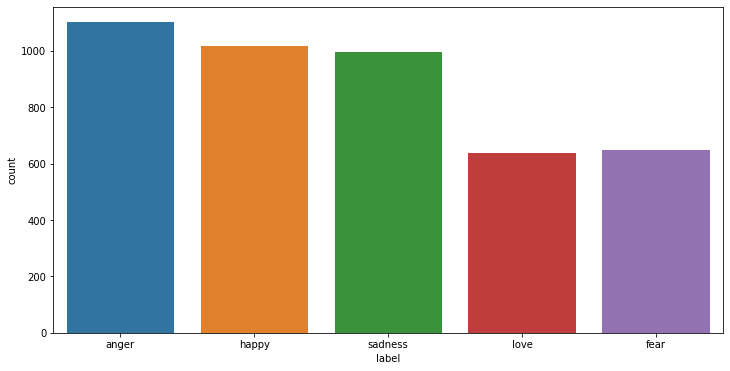

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x='label', data=df)

In [ ]:
def get_top_Nwords(corpus, n=None, remove_stop_words=False, n_words=1):
    if remove_stop_words:
        vec = CountVectorizer(stop_words='english', ngram_range=(n_words, n_words)).fit(corpus)
    else:
        vec = CountVectorizer(ngram_range=(n_words, n_words)).fit(corpus)

    bag_ofWords =vec.transform(corpus)
    sum_words = bag_ofWords.sum(axis=0)
    words_freq = [(word, sum_words[0,idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

In [ ]:
common_words = get_top_Nwords(df['tweet'].drop_duplicates(), 20, remove_stop_words=True, n_words=2)
for word, freq in common_words:
    print(word, freq)

username username 634
ada yang 91
ada yg 87
orang yang 86
jatuh cinta 78
hari ini 68
username url 65
orang lain 65
orang yg 58
terima kasih 58
apa yang 55
ga ada 53
ya allah 53
aku sayang 45
ga bisa 43
salah satu 42
sayang banget 41
orang orang 40
ada di 36
saat ini 36


### Preprocessing

In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
nltk.download('stopwords')
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize, TweetTokenizer
from nltk.corpus import stopwords

from collections import Counter
from tqdm import tqdm
import os
import random
import re
import string
import pickle
import json
from io import StringIO

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df['tweet'] = " " + df['tweet'] + " "

In [ ]:
df['tweet'] = df['tweet'].str.replace(r"((\\x[a-z0-9]{1,}){1,})", "")
df['tweet'] = df['tweet'].str.replace("USERNAME", "")
#link
df['tweet'] = df['tweet'].str.replace(r"http\S+", "")
df['tweet'] = df['tweet'].str.replace("URL", "")
#mention
df['tweet'] = df['tweet'].str.replace('@[^\s]+', "")
#hastag
df['tweet'] = df['tweet'].str.replace(r'#([^\s]+)', "")
#baris
df['tweet'] = df['tweet'].str.replace(r"\\n", " ")
#Sensitive number, such as phone number, invoice number and courier
df['tweet'] = df['tweet'].str.replace("SENSITIVE-NO", "")

df['tweet'] = df['tweet'].str.replace("askmf", "")

<ipython-input-19-f23871228384>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['tweet'] = df['tweet'].str.replace(r"((\\x[a-z0-9]{1,}){1,})", "")
<ipython-input-19-f23871228384>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df['tweet'] = df['tweet'].str.replace(r"http\S+", "")
<ipython-input-19-f23871228384>:7: FutureWarning: The default value of regex will change from True to False in a future version.
  df['tweet'] = df['tweet'].str.replace('@[^\s]+', "")
<ipython-input-19-f23871228384>:9: FutureWarning: The default value of regex will change from True to False in a future version.
  df['tweet'] = df['tweet'].str.replace(r'#([^\s]+)', "")
<ipython-input-19-f23871228384>:11: FutureWarning: The default value of regex will change from True to False in a future version.
  df['tweet'] = df['tweet'].str.replace(r"\\n", " ")


In [ ]:
df['tweet'] = df['tweet'].str.translate(str.maketrans(string.punctuation, ' '*len(string.punctuation)))
#Menghapus angka
df['tweet'] = df['tweet'].replace(regex='\d+', value='')
#lowercase
df['tweet'] = df['tweet'].str.lower()

In [ ]:
alay_dict = pd.read_csv('https://raw.githubusercontent.com/thoriqfy/indonlu/master/dataset/new_kamusalay.csv', encoding='latin-1', header=None)
alay_dict = alay_dict.rename(columns={0: 'original',
                                      1: 'replacement'})

idn_stopwords = stopwords.words('indonesian')

In [ ]:
df_clean = df.copy()

In [ ]:
tweet_tokenizer = TweetTokenizer()

def tokenize_tweet(text):
  return " ".join(tweet_tokenizer.tokenize(text))

def remove_unnecessary_char(text):
  text = re.sub("\[USERNAME\]", " ", text)
  text = re.sub("\[URL\]", " ", text)
  text = re.sub("\[SENSITIVE-NO\]", " ", text)
  text = re.sub('  +', ' ', text)
  return text

def preprocess_tweet(text):
  text = re.sub('\n',' ',text) # Remove every '\n'
  # text = re.sub('rt',' ',text) # Remove every retweet symbol
  text = re.sub('^(\@\w+ ?)+',' ',text)
  text = re.sub(r'\@\w+',' ',text) # Remove every username
  text = re.sub('((www\.[^\s]+)|(https?://[^\s]+)|(http?://[^\s]+))',' ',text) # Remove every URL
  text = re.sub('/', ' ', text)
  # text = re.sub(r'[^\w\s]', '', text)
  text = re.sub('  +', ' ', text) # Remove extra spaces
  return text

alay_dict_map = dict(zip(alay_dict['original'], alay_dict['replacement']))
alay_dict_map.update({
    "pks"   : "pencegahan kekerasan seksual",
    "p-ks"  : "pencegahan kekerasan seksual",
    "ks"    : "kekerasan seksual"
})
def normalize_alay(text):
  return ' '.join([alay_dict_map[word] if word in alay_dict_map else word for word in text.split(' ')])

def remove_nonaplhanumeric(text):
  text = re.sub('[^0-9a-zA-Z]+', ' ', text)
  return text

def remove_stopword(text):
  text = ' '.join(['' if word in idn_stopwords else word for word in text.split(' ')])
  text = re.sub('  +', ' ', text)
  text = text.strip()
  return text

In [ ]:
def preprocess(text, alay = False, tweet = False):
  if(tweet):
    text = preprocess_tweet(text)
  text = remove_unnecessary_char(text)
  text = text.lower()
  text = tokenize_tweet(text)
  if (alay):
    text = normalize_alay(text)
  return text

In [ ]:
df_clean["clean_text"] = df_clean["tweet"].apply(preprocess, args = (True, True,))
df_clean["no_stopword_text"] = df_clean["clean_text"].apply(remove_nonaplhanumeric).apply(remove_stopword)

df_clean[["label","tweet", "clean_text", "no_stopword_text"]].head(50)

,label,tweet,clean_text,no_stopword_text
0,anger,soal jln jatibaru polisi tdk bs gertak gubern...,soal jalan jatibaru polisi tidak bisa gertak g...,jalan jatibaru polisi gertak gubernur emangny ...
1,anger,sesama cewe lho kayaknya harusnya bisa leb...,sesama cewek lo kayaknya harusnya bisa lebih r...,cewek lo kayaknya rasakan sibuk jaga rasakan s...
2,happy,kepingin gudeg mbarek bu hj amad foto dari g...,ingin gudeg mbarek bu hj amat foto dari google...,gudeg mbarek bu hj foto google sengaja biar te...
3,anger,jln jatibaru bagian dari wilayah tn abang pen...,jalan jatibaru bagian dari wilayah tn abang pe...,jalan jatibaru wilayah tn abang pengaturan wil...
4,happy,sharing pengalaman aja kemarin jam batalin...,sharing pengalaman saja kemarin jam batalin ti...,sharing pengalaman kemarin jam batalin tiket s...
5,anger,dari sekian banyak thread yang aku baca thre...,dari sekian banyak thread yang aku baca thread...,sekian thread baca thread aneh sih penulisan s...
6,happy,sharing sama temen tuh emg guna bgt disaat l...,sharing sama teman itu memang guna banget di s...,sharing teman banget berat banget teman berat ...
7,sadness,orang lain kalau pake ponco itu buat jas huja...,orang lain kalau pakai ponco itu buat jas huja...,orang pakai ponco jas hujan pakai kasur ya gar...
8,anger,contoh mereka yg gemar menyudutkan teriak pa...,contoh mereka yang gemar menyudutkan teriak pa...,contoh gemar menyudutkan teriak toleran gemar ...
9,sadness,pulang udah h lebaran dilema sekali seperti...,pulang sudah h lebaran dilema sekali seperti t...,pulang h lebaran dilema rumah lebaran buka pua...


## Feature Extraction

In [ ]:
X = df_clean['no_stopword_text']
y = df_clean['label'].values

In [ ]:
count_vect = CountVectorizer()
X_count = count_vect.fit_transform(X)

tfidf_transformer = TfidfTransformer()
X_tfidf = tfidf_transformer.fit_transform(X_count)

## Building Model

Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(multi_class='multinomial', penalty='l2', solver='newton-cg', C= 1.623776739188721)
classifier.fit(X_tfidf, y)

LogisticRegression(C=1.623776739188721, multi_class='multinomial',
                   solver='newton-cg')

In [ ]:
from sklearn.model_selection import cross_val_predict
predLR = cross_val_predict(estimator = classifier, X = X_tfidf, y = y, cv = 10)

In [ ]:
from sklearn.metrics import confusion_matrix
conf_mat2 = confusion_matrix(y, predLR)
conf_mat2

array([[826,  24,  92,   7, 152],
       [ 97, 397,  51,  10,  94],
       [138,  10, 649,  32, 188],
       [ 31,   8,  94, 431,  73],
       [234,  18, 163,  50, 532]])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y, predLR))

              precision    recall  f1-score   support

       anger       0.62      0.75      0.68      1101
        fear       0.87      0.61      0.72       649
       happy       0.62      0.64      0.63      1017
        love       0.81      0.68      0.74       637
     sadness       0.51      0.53      0.52       997

    accuracy                           0.64      4401
   macro avg       0.69      0.64      0.66      4401
weighted avg       0.66      0.64      0.65      4401



In [ ]:
classifier2 = LogisticRegression(multi_class='multinomial', penalty='l2', solver='newton-cg', C= 1.623776739188721)
classifier2.fit(X_count, y)

predLR2 = cross_val_predict(estimator = classifier2, X = X_count, y = y, cv = 10)

conf_mat22 = confusion_matrix(y, predLR2)
conf_mat22

print(classification_report(y, predLR2))

              precision    recall  f1-score   support

       anger       0.64      0.69      0.66      1101
        fear       0.82      0.67      0.73       649
       happy       0.62      0.61      0.61      1017
        love       0.77      0.70      0.73       637
     sadness       0.50      0.55      0.52       997

    accuracy                           0.64      4401
   macro avg       0.67      0.64      0.65      4401
weighted avg       0.65      0.64      0.64      4401



KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=10, leaf_size=1, n_jobs= -1, weights= 'distance')
knn.fit(X_tfidf, y)

KNeighborsClassifier(leaf_size=1, n_jobs=-1, n_neighbors=10, weights='distance')

In [ ]:
predKNN = cross_val_predict(estimator = knn, X = X_tfidf, y = y, cv = 10)

In [ ]:
conf_mat = confusion_matrix(y, predKNN)
conf_mat

array([[675,  96, 113,  59, 158],
       [119, 295,  68,  59, 108],
       [161,  78, 486, 106, 186],
       [ 34,  20,  81, 440,  62],
       [185, 111, 177, 165, 359]])

In [ ]:
print(classification_report(y, predKNN))

              precision    recall  f1-score   support

       anger       0.57      0.61      0.59      1101
        fear       0.49      0.45      0.47       649
       happy       0.53      0.48      0.50      1017
        love       0.53      0.69      0.60       637
     sadness       0.41      0.36      0.38       997

    accuracy                           0.51      4401
   macro avg       0.51      0.52      0.51      4401
weighted avg       0.51      0.51      0.51      4401



In [ ]:
knn2 = KNeighborsClassifier(n_neighbors=10, leaf_size=1, n_jobs= -1, weights= 'distance')
knn2.fit(X_count, y)

predKNN2 = cross_val_predict(estimator = knn2, X = X_count, y = y, cv = 10)

conf_mat2 = confusion_matrix(y, predKNN2)
print(conf_mat2)

print(classification_report(y, predKNN2))

[[276  12  29 142 642]
 [104  91  26 129 299]
 [140   1 200 180 496]
 [ 28   0  49 438 122]
 [172   7  29 179 610]]
              precision    recall  f1-score   support

       anger       0.38      0.25      0.30      1101
        fear       0.82      0.14      0.24       649
       happy       0.60      0.20      0.30      1017
        love       0.41      0.69      0.51       637
     sadness       0.28      0.61      0.39       997

    accuracy                           0.37      4401
   macro avg       0.50      0.38      0.35      4401
weighted avg       0.48      0.37      0.34      4401



Multinomial NB

In [ ]:
from sklearn.naive_bayes import MultinomialNB
clf=MultinomialNB()
clf.fit(X_tfidf, y)

MultinomialNB()

In [ ]:
predNB = cross_val_predict(estimator = clf, X = X_tfidf, y = y, cv = 10)
conf_matNB = confusion_matrix(y, predNB)

In [ ]:
print(classification_report(y, predNB))


              precision    recall  f1-score   support

       anger       0.56      0.84      0.67      1101
        fear       0.95      0.31      0.47       649
       happy       0.56      0.65      0.60      1017
        love       0.86      0.40      0.54       637
     sadness       0.48      0.51      0.49       997

    accuracy                           0.58      4401
   macro avg       0.68      0.54      0.56      4401
weighted avg       0.64      0.58      0.57      4401



In [ ]:
clf2=MultinomialNB()
clf2.fit(X_count, y)
predNB2 = cross_val_predict(estimator = clf2, X = X_count, y = y, cv = 10)
print(confusion_matrix(y, predNB2))
print(classification_report(y, predNB2))

[[819  72  70  10 130]
 [ 86 423  49  17  74]
 [118  60 619  65 155]
 [ 14  18 104 437  64]
 [174  92 159  99 473]]
              precision    recall  f1-score   support

       anger       0.68      0.74      0.71      1101
        fear       0.64      0.65      0.64       649
       happy       0.62      0.61      0.61      1017
        love       0.70      0.69      0.69       637
     sadness       0.53      0.47      0.50       997

    accuracy                           0.63      4401
   macro avg       0.63      0.63      0.63      4401
weighted avg       0.63      0.63      0.63      4401



Linear SVC

In [ ]:
from sklearn.svm import SVC
svm=SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
svm.fit(X_tfidf, y)

SVC(gamma='auto', kernel='linear')

In [ ]:
svmPred = cross_val_predict(estimator = svm, X = X_tfidf, y = y, cv = 10)

In [ ]:
svmPred

array(['anger', 'fear', 'happy', ..., 'sadness', 'sadness', 'sadness'],
      dtype=object)

In [ ]:
conf_matSVM = confusion_matrix(y, svmPred)

In [ ]:
print(classification_report(y, svmPred))

              precision    recall  f1-score   support

       anger       0.63      0.72      0.67      1101
        fear       0.89      0.62      0.73       649
       happy       0.62      0.62      0.62      1017
        love       0.79      0.69      0.74       637
     sadness       0.50      0.56      0.53       997

    accuracy                           0.64      4401
   macro avg       0.69      0.64      0.66      4401
weighted avg       0.66      0.64      0.64      4401



In [ ]:
svm2=SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
svm2.fit(X_count, y)

svmPred2 = cross_val_predict(estimator = svm2, X = X_count, y = y, cv = 10)
print(confusion_matrix(y, svmPred2))
print(classification_report(y, svmPred2))

[[730  48 101  10 212]
 [ 93 432  56  11  57]
 [156  25 588  59 189]
 [ 32  12  80 444  69]
 [211  39 169  64 514]]
              precision    recall  f1-score   support

       anger       0.60      0.66      0.63      1101
        fear       0.78      0.67      0.72       649
       happy       0.59      0.58      0.58      1017
        love       0.76      0.70      0.72       637
     sadness       0.49      0.52      0.50       997

    accuracy                           0.62      4401
   macro avg       0.64      0.62      0.63      4401
weighted avg       0.62      0.62      0.62      4401



## Deep Learning

In [ ]:
label_encoder = LabelEncoder()
encoded_label = label_encoder.fit_transform(emotion)

print(label_encoder.classes_)

label_OneHotEncoder = OneHotEncoder()
encoded_label = label_OneHotEncoder.fit_transform(encoded_label.reshape(-1,1)).toarray()

['anger' 'fear' 'happy' 'love' 'sadness']


In [ ]:
vocabulary_size = 10000
input_length = 30

In [ ]:
tokenizer = Tokenizer(num_words= vocabulary_size)
tokenizer.fit_on_texts(df['tweet'])
sequences = tokenizer.texts_to_sequences(df['tweet'])
data = pad_sequences(sequences, maxlen = input_length)

In [ ]:
train_data, test_data, train_label, test_label = train_test_split(data, encoded_label, test_size = 0.2)


In [ ]:
num_classes = len(class_values)
validation_split = 0.2

In [ ]:
def plot_model(history):
    # Plot training & validation accuracy values
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training accuracy',linewidth=3.0)
    plt.plot(x, val_acc, 'r', label='Validation accuracy',linewidth=3.0)
    plt.title('Training and validation accuracy',fontsize=18)
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss',linewidth=3.0)
    plt.plot(x, val_loss, 'r', label='Validation loss',linewidth=3.0)
    plt.title('Training and validation loss', fontsize=18)
    plt.legend()

In [ ]:
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

LSTM

In [ ]:
output_dim = 8
dense_input = 1000


validation_split = 0.2
epochs = 100

callback_patience = 2

In [ ]:
callback = [EarlyStopping(monitor='val_loss', patience = callback_patience)]


In [ ]:
model_lstm = Sequential()
model_lstm.add(Embedding(vocabulary_size, dense_input, input_length = input_length))
model_lstm.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2,activation='tanh'))
model_lstm.add(Dense(num_classes, activation='softmax'))
model_lstm.compile(loss='binary_crossentropy', optimizer='nadam', metrics=['accuracy',f1_m,precision_m, recall_m])

In [ ]:
model_lstm.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 30, 1000)          10000000  
                                                                 
 lstm (LSTM)                 (None, 100)               440400    
                                                                 
 dense (Dense)               (None, 5)                 505       
                                                                 
Total params: 10,440,905
Trainable params: 10,440,905
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model_lstm.fit(train_data, train_label, validation_split = validation_split, epochs=epochs, batch_size=4,
                    shuffle = True, callbacks = callback)

Epoch 1/100
704/704 [==============================] - 46s 59ms/step - loss: 0.4405 - accuracy: 0.4094 - f1_m: 0.2359 - precision_m: 0.3474 - recall_m: 0.1918 - val_loss: 0.3574 - val_accuracy: 0.5895 - val_f1_m: 0.5293 - val_precision_m: 0.6624 - val_recall_m: 0.4616
Epoch 2/100
704/704 [==============================] - 41s 58ms/step - loss: 0.2293 - accuracy: 0.7710 - f1_m: 0.7613 - precision_m: 0.7966 - recall_m: 0.7372 - val_loss: 0.3597 - val_accuracy: 0.5966 - val_f1_m: 0.5889 - val_precision_m: 0.6122 - val_recall_m: 0.5739
Epoch 3/100
704/704 [==============================] - 42s 59ms/step - loss: 0.0635 - accuracy: 0.9499 - f1_m: 0.9504 - precision_m: 0.9536 - recall_m: 0.9482 - val_loss: 0.4562 - val_accuracy: 0.5866 - val_f1_m: 0.5801 - val_precision_m: 0.5890 - val_recall_m: 0.5739


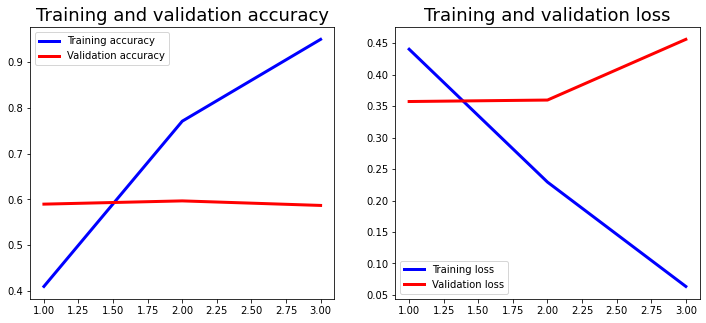

In [ ]:
plot_model(history)

In [ ]:
model_lstm.evaluate(test_data, test_label, verbose = 1)

28/28 [==============================] - 1s 13ms/step - loss: 0.4587 - accuracy: 0.5596 - f1_m: 0.5552 - precision_m: 0.5689 - recall_m: 0.5423


[0.45871683955192566,
 0.5595913529396057,
 0.5551748871803284,
 0.5689117312431335,
 0.5423450469970703]

In [ ]:
output_dim = 8
dense_input = 1000

l1_dropout = 0.2
l1_recurrent_dropout = 0.2

l2_dropout = 0.2
l2_recurrent_dropout = 0.2

l1_lstm_units = 128
l2_lstm_units = 64

validation_split = 0.2
epochs = 100

callback_patience = 2

In [ ]:
callback = [EarlyStopping(monitor='val_loss', patience = callback_patience)]


In [ ]:
model = Sequential()

model.add(Embedding(vocabulary_size, dense_input, input_length = input_length))
model.add(Dense(dense_input, activation='tanh'))

model.add(LSTM(l1_lstm_units, dropout = l1_dropout, recurrent_dropout = l1_recurrent_dropout,
                             return_sequences = True, activation='tanh'))
model.add(LSTM(l2_lstm_units, dropout = l2_dropout, recurrent_dropout = l2_recurrent_dropout,
                             return_sequences = False, activation='tanh'))

model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy',f1_m,precision_m, recall_m])

In [ ]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 30, 1000)          10000000  
                                                                 
 dense_1 (Dense)             (None, 30, 1000)          1001000   
                                                                 
 lstm_1 (LSTM)               (None, 30, 128)           578048    
                                                                 
 lstm_2 (LSTM)               (None, 64)                49408     
                                                                 
 dense_2 (Dense)             (None, 5)                 325       
                                                                 
Total params: 11,628,781
Trainable params: 11,628,781
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(train_data, train_label, validation_split = validation_split, epochs=epochs, batch_size=4,
                    shuffle = True, callbacks = callback)

Epoch 1/100
704/704 [==============================] - 83s 113ms/step - loss: 0.4599 - accuracy: 0.3512 - f1_m: 0.1648 - precision_m: 0.2970 - recall_m: 0.1222 - val_loss: 0.4098 - val_accuracy: 0.4730 - val_f1_m: 0.4141 - val_precision_m: 0.5601 - val_recall_m: 0.3452
Epoch 2/100
704/704 [==============================] - 80s 113ms/step - loss: 0.2980 - accuracy: 0.6808 - f1_m: 0.6651 - precision_m: 0.7290 - recall_m: 0.6257 - val_loss: 0.3869 - val_accuracy: 0.5398 - val_f1_m: 0.5217 - val_precision_m: 0.5715 - val_recall_m: 0.4915
Epoch 3/100
704/704 [==============================] - 80s 114ms/step - loss: 0.1443 - accuracy: 0.8661 - f1_m: 0.8679 - precision_m: 0.8790 - recall_m: 0.8597 - val_loss: 0.4367 - val_accuracy: 0.5440 - val_f1_m: 0.5432 - val_precision_m: 0.5663 - val_recall_m: 0.5270
Epoch 4/100
704/704 [==============================] - 78s 111ms/step - loss: 0.0739 - accuracy: 0.9435 - f1_m: 0.9435 - precision_m: 0.9483 - recall_m: 0.9400 - val_loss: 0.5398 - val_accur

In [ ]:
model.evaluate(test_data, test_label, verbose = 1)


28/28 [==============================] - 1s 22ms/step - loss: 0.5538 - accuracy: 0.5267 - f1_m: 0.5248 - precision_m: 0.5349 - recall_m: 0.5157


[0.5538391470909119,
 0.526674211025238,
 0.5248419046401978,
 0.5349485278129578,
 0.5156906843185425]

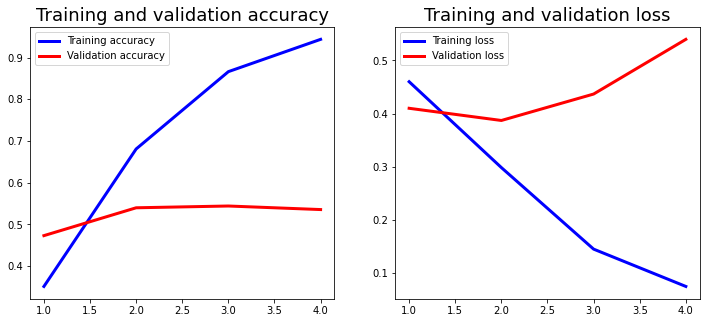

In [ ]:
plot_model(history)


## BERT

In [ ]:
import os, sys
# sys.path.append('../')
# os.chdir('../')

import random
import numpy as np
import pandas as pd
import torch
from torch import optim
import torch.nn.functional as F
from tqdm import tqdm

from transformers import BertForSequenceClassification, BertConfig, BertTokenizer
from nltk.tokenize import TweetTokenizer
from torch.utils.data import Dataset, DataLoader

### Base With origin Data

In [ ]:
from utils.forward_fn import forward_sequence_classification
from utils.metrics import document_sentiment_metrics_fn
from utils.data_utils import EmotionDetectionDataset, EmotionDetectionDataLoader

In [ ]:
def set_seed(seed):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)

def count_param(module, trainable=False):
    if trainable:
        return sum(p.numel() for p in module.parameters() if p.requires_grad)
    else:
        return sum(p.numel() for p in module.parameters())

def get_lr(optimizer):
    for param_group in optimizer.param_groups:
        return param_group['lr']

def metrics_to_string(metric_dict):
    string_list = []
    for key, value in metric_dict.items():
        string_list.append('{}:{:.2f}'.format(key, value))
    return ' '.join(string_list)

In [ ]:
set_seed(26092020)


In [ ]:
w2i, i2w = EmotionDetectionDataset.LABEL2INDEX, EmotionDetectionDataset.INDEX2LABEL
print(w2i)
print(i2w)

{'sadness': 0, 'anger': 1, 'love': 2, 'fear': 3, 'happy': 4}
{0: 'sadness', 1: 'anger', 2: 'love', 3: 'fear', 4: 'happy'}


In [ ]:
# Load Tokenizer and Config
tokenizer = BertTokenizer.from_pretrained('indobenchmark/indobert-base-p1')
config = BertConfig.from_pretrained('indobenchmark/indobert-base-p1')
config.num_labels = EmotionDetectionDataset.NUM_LABELS

# Instantiate model
model = BertForSequenceClassification.from_pretrained('indobenchmark/indobert-base-p1', config=config)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p1 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
model

In [ ]:
count_param(model)

124445189

In [ ]:
train_dataset_path = './dataset/emot_emotion-twitter/train_preprocess.csv'
valid_dataset_path = './dataset/emot_emotion-twitter/valid_preprocess.csv'
test_dataset_path = './dataset/emot_emotion-twitter/test_preprocess_masked_label.csv'

In [ ]:
train_dataset = EmotionDetectionDataset(train_dataset_path, tokenizer, lowercase=True)
valid_dataset = EmotionDetectionDataset(valid_dataset_path, tokenizer, lowercase=True)
test_dataset = EmotionDetectionDataset(test_dataset_path, tokenizer, lowercase=True)

train_loader = EmotionDetectionDataLoader(dataset=train_dataset, max_seq_len=512, batch_size=32, num_workers=16, shuffle=True)
valid_loader = EmotionDetectionDataLoader(dataset=valid_dataset, max_seq_len=512, batch_size=32, num_workers=16, shuffle=False)
test_loader = EmotionDetectionDataLoader(dataset=test_dataset, max_seq_len=512, batch_size=32, num_workers=16, shuffle=False)

In [ ]:

text = 'Bahagia hatiku melihat pernikahan putri sulungku yang cantik jelita'
subwords = tokenizer.encode(text)
subwords = torch.LongTensor(subwords).view(1, -1).to(model.device)

logits = model(subwords)[0]
label = torch.topk(logits, k=1, dim=-1)[1].squeeze().item()

print(f'Text: {text} | Label : {i2w[label]} ({F.softmax(logits, dim=-1).squeeze()[label] * 100:.3f}%)')

Text: Bahagia hatiku melihat pernikahan putri sulungku yang cantik jelita | Label : sadness (26.509%)


In [ ]:
optimizer = optim.Adam(model.parameters(), lr=5e-6)
model = model.cuda()

In [ ]:
# Train
n_epochs = 10
for epoch in range(n_epochs):
    model.train()
    torch.set_grad_enabled(True)

    total_train_loss = 0
    list_hyp, list_label = [], []

    train_pbar = tqdm(train_loader, leave=True, total=len(train_loader))
    for i, batch_data in enumerate(train_pbar):
        # Forward model
        loss, batch_hyp, batch_label = forward_sequence_classification(model, batch_data[:-1], i2w=i2w, device='cuda')

        # Update model
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        tr_loss = loss.item()
        total_train_loss = total_train_loss + tr_loss

        # Calculate metrics
        list_hyp += batch_hyp
        list_label += batch_label

        train_pbar.set_description("(Epoch {}) TRAIN LOSS:{:.4f} LR:{:.8f}".format((epoch+1),
            total_train_loss/(i+1), get_lr(optimizer)))

    # Calculate train metric
    metrics = document_sentiment_metrics_fn(list_hyp, list_label)
    print("(Epoch {}) TRAIN LOSS:{:.4f} {} LR:{:.8f}".format((epoch+1),
        total_train_loss/(i+1), metrics_to_string(metrics), get_lr(optimizer)))

    # Evaluate on validation
    model.eval()
    torch.set_grad_enabled(False)

    total_loss, total_correct, total_labels = 0, 0, 0
    list_hyp, list_label = [], []

    pbar = tqdm(valid_loader, leave=True, total=len(valid_loader))
    for i, batch_data in enumerate(pbar):
        batch_seq = batch_data[-1]
        loss, batch_hyp, batch_label = forward_sequence_classification(model, batch_data[:-1], i2w=i2w, device='cuda')

        # Calculate total loss
        valid_loss = loss.item()
        total_loss = total_loss + valid_loss

        # Calculate evaluation metrics
        list_hyp += batch_hyp
        list_label += batch_label
        metrics = document_sentiment_metrics_fn(list_hyp, list_label)

        pbar.set_description("VALID LOSS:{:.4f} {}".format(total_loss/(i+1), metrics_to_string(metrics)))

    metrics = document_sentiment_metrics_fn(list_hyp, list_label)
    print("(Epoch {}) VALID LOSS:{:.4f} {}".format((epoch+1),
        total_loss/(i+1), metrics_to_string(metrics)))

In [ ]:
def document_sentiment_metrics_fn(list_hyp, list_label):
    metrics = {}
    metrics["ACC"] = accuracy_score(list_label, list_hyp)
    metrics["F1"] = f1_score(list_label, list_hyp, average='macro')
    metrics["REC"] = recall_score(list_label, list_hyp, average='macro')
    metrics["PRE"] = precision_score(list_label, list_hyp, average='macro')
    return metrics

In [ ]:
# Evaluate on test
model.eval()
torch.set_grad_enabled(False)

total_loss, total_correct, total_labels = 0, 0, 0
list_hyp, list_label = [], []

pbar = tqdm(test_loader, leave=True, total=len(test_loader))
for i, batch_data in enumerate(pbar):
    _, batch_hyp, _ = forward_sequence_classification(model, batch_data[:-1], i2w=i2w, device='cuda')
    list_hyp += batch_hyp

# Save prediction
df = pd.DataFrame({'label':list_hyp}).reset_index()
df.to_csv('pred.txt', index=False)

print(df)

  0%|          | 0/14 [00:00<?, ?it/s]/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py:554: UserWarning: This DataLoader will create 16 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
100%|██████████| 14/14 [00:03<00:00,  4.58it/s]

     index    label
0        0     love
1        1     fear
2        2     fear
3        3    happy
4        4    happy
..     ...      ...
435    435  sadness
436    436  sadness
437    437     fear
438    438  sadness
439    439    happy

[440 rows x 2 columns]


In [ ]:
df_valid=pd.read_csv('https://raw.githubusercontent.com/IndoNLP/indonlu/master/dataset/emot_emotion-twitter/test_preprocess.csv')

In [ ]:
ytest=df['label'].to_numpy()
ytest

In [ ]:
ypred=df_valid['label'].to_numpy()
ypred

In [ ]:
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

       anger       0.76      0.78      0.77       108
        fear       0.77      0.81      0.79        62
       happy       0.73      0.75      0.74        99
        love       0.75      0.80      0.77        60
     sadness       0.69      0.62      0.65       111

    accuracy                           0.74       440
   macro avg       0.74      0.75      0.75       440
weighted avg       0.74      0.74      0.74       440



In [ ]:
text = 'Bahagia hatiku melihat pernikahan putri sulungku yang cantik jelita'
subwords = tokenizer.encode(text)
subwords = torch.LongTensor(subwords).view(1, -1).to(model.device)

logits = model(subwords)[0]
label = torch.topk(logits, k=1, dim=-1)[1].squeeze().item()

print(f'Text: {text} | Label : {i2w[label]} ({F.softmax(logits, dim=-1).squeeze()[label] * 100:.3f}%)')

Text: Bahagia hatiku melihat pernikahan putri sulungku yang cantik jelita | Label : happy (97.752%)


In [ ]:
import os

# Saving best-practices: if you use defaults names for the model, you can reload it using from_pretrained()

output_dir = '/content/drive/MyDrive/Data'

print("Saving model to %s" % output_dir)

# Save a trained model, configuration and tokenizer using `save_pretrained()`.
# They can then be reloaded using `from_pretrained()`
model_to_save = model.module if hasattr(model, 'module') else model  # Take care of distributed/parallel training
model_to_save.save_pretrained(output_dir)
tokenizer.save_pretrained(output_dir)

Saving model to /content/drive/MyDrive/Data


('/content/drive/MyDrive/Data/tokenizer_config.json',
 '/content/drive/MyDrive/Data/special_tokens_map.json',
 '/content/drive/MyDrive/Data/vocab.txt',
 '/content/drive/MyDrive/Data/added_tokens.json')

In [ ]:
def plot_model(history):
    # Plot training & validation accuracy values
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training accuracy',linewidth=3.0)
    plt.plot(x, val_acc, 'r', label='Validation accuracy',linewidth=3.0)
    plt.title('Training and validation accuracy',fontsize=18)
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss',linewidth=3.0)
    plt.plot(x, val_loss, 'r', label='Validation loss',linewidth=3.0)
    plt.title('Training and validation loss', fontsize=18)
    plt.legend()

In [ ]:
output_dir = '/content/drive/MyDrive/Data'

In [ ]:

model = BertForSequenceClassification.from_pretrained(output_dir)
tokenizer = BertTokenizer.from_pretrained(output_dir)

In [ ]:
from utils.forward_fn import forward_sequence_classification
from utils.metrics import document_sentiment_metrics_fn
from utils.data_utils import EmotionDetectionDataset, EmotionDetectionDataLoader

In [ ]:
config = BertConfig.from_pretrained(output_dir)
config.num_labels = EmotionDetectionDataset.NUM_LABELS

In [ ]:
w2i, i2w = EmotionDetectionDataset.LABEL2INDEX, EmotionDetectionDataset.INDEX2LABEL
print(w2i)
print(i2w)

{'sadness': 0, 'anger': 1, 'love': 2, 'fear': 3, 'happy': 4}
{0: 'sadness', 1: 'anger', 2: 'love', 3: 'fear', 4: 'happy'}


In [ ]:
text = 'Bahagia hatiku melihat pernikahan putri sulungku yang cantik jelita'
subwords = tokenizer.encode(text)
subwords = torch.LongTensor(subwords).view(1, -1).to(model.device)

logits = model(subwords)[0]
label = torch.topk(logits, k=1, dim=-1)[1].squeeze().item()

print(f'Text: {text} | Label : {i2w[label]} ({F.softmax(logits, dim=-1).squeeze()[label] * 100:.3f}%)')

Text: Bahagia hatiku melihat pernikahan putri sulungku yang cantik jelita | Label : happy (97.752%)


In [ ]:
from transformers import pipeline
pretrained_name = "StevenLimcorn/indonesian-roberta-base-emotion-classifier"
nlp = pipeline(
    "sentiment-analysis",
    model=pretrained_name,
    tokenizer=pretrained_name
)
nlp("Hal-hal baik akan datang.")

[{'label': 'happy', 'score': 0.5701655745506287}]

### Large with Origin Data

In [ ]:
# Load Tokenizer and Config
tokenizer = BertTokenizer.from_pretrained('indobenchmark/indobert-large-p2')
config = BertConfig.from_pretrained('indobenchmark/indobert-large-p2')
config.num_labels = EmotionDetectionDataset.NUM_LABELS

# Instantiate model
model = BertForSequenceClassification.from_pretrained('indobenchmark/indobert-large-p2', config=config)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-large-p2 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
train_dataset_path = './dataset/emot_emotion-twitter/train_preprocess.csv'
valid_dataset_path = './dataset/emot_emotion-twitter/valid_preprocess.csv'
test_dataset_path = './dataset/emot_emotion-twitter/test_preprocess_masked_label.csv'

In [ ]:
train_dataset = EmotionDetectionDataset(train_dataset_path, tokenizer, lowercase=True)
valid_dataset = EmotionDetectionDataset(valid_dataset_path, tokenizer, lowercase=True)
test_dataset = EmotionDetectionDataset(test_dataset_path, tokenizer, lowercase=True)

train_loader = EmotionDetectionDataLoader(dataset=train_dataset, max_seq_len=512, batch_size=32, num_workers=16, shuffle=True)
valid_loader = EmotionDetectionDataLoader(dataset=valid_dataset, max_seq_len=512, batch_size=32, num_workers=16, shuffle=False)
test_loader = EmotionDetectionDataLoader(dataset=test_dataset, max_seq_len=512, batch_size=32, num_workers=16, shuffle=False)

/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py:561: UserWarning: This DataLoader will create 16 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [ ]:
w2i, i2w = EmotionDetectionDataset.LABEL2INDEX, EmotionDetectionDataset.INDEX2LABEL
print(w2i)
print(i2w)

{'sadness': 0, 'anger': 1, 'love': 2, 'fear': 3, 'happy': 4}
{0: 'sadness', 1: 'anger', 2: 'love', 3: 'fear', 4: 'happy'}


In [ ]:
optimizer = optim.Adam(model.parameters(), lr=5e-6)
model = model.cuda()

In [ ]:
# Train
n_epochs = 10
for epoch in range(n_epochs):
    model.train()
    torch.set_grad_enabled(True)

    total_train_loss = 0
    list_hyp, list_label = [], []

    train_pbar = tqdm(train_loader, leave=True, total=len(train_loader))
    for i, batch_data in enumerate(train_pbar):
        # Forward model
        loss, batch_hyp, batch_label = forward_sequence_classification(model, batch_data[:-1], i2w=i2w, device='cuda')

        # Update model
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        tr_loss = loss.item()
        total_train_loss = total_train_loss + tr_loss

        # Calculate metrics
        list_hyp += batch_hyp
        list_label += batch_label

        train_pbar.set_description("(Epoch {}) TRAIN LOSS:{:.4f} LR:{:.8f}".format((epoch+1),
            total_train_loss/(i+1), get_lr(optimizer)))

    # Calculate train metric
    metrics = document_sentiment_metrics_fn(list_hyp, list_label)
    print("(Epoch {}) TRAIN LOSS:{:.4f} {} LR:{:.8f}".format((epoch+1),
        total_train_loss/(i+1), metrics_to_string(metrics), get_lr(optimizer)))

    # Evaluate on validation
    model.eval()
    torch.set_grad_enabled(False)

    total_loss, total_correct, total_labels = 0, 0, 0
    list_hyp, list_label = [], []

    pbar = tqdm(valid_loader, leave=True, total=len(valid_loader))
    for i, batch_data in enumerate(pbar):
        batch_seq = batch_data[-1]
        loss, batch_hyp, batch_label = forward_sequence_classification(model, batch_data[:-1], i2w=i2w, device='cuda')

        # Calculate total loss
        valid_loss = loss.item()
        total_loss = total_loss + valid_loss

        # Calculate evaluation metrics
        list_hyp += batch_hyp
        list_label += batch_label
        metrics = document_sentiment_metrics_fn(list_hyp, list_label)

        pbar.set_description("VALID LOSS:{:.4f} {}".format(total_loss/(i+1), metrics_to_string(metrics)))

    metrics = document_sentiment_metrics_fn(list_hyp, list_label)
    print("(Epoch {}) VALID LOSS:{:.4f} {}".format((epoch+1),
        total_loss/(i+1), metrics_to_string(metrics)))

In [ ]:
# Evaluate on test
model.eval()
torch.set_grad_enabled(False)

total_loss, total_correct, total_labels = 0, 0, 0
list_hyp, list_label = [], []

pbar = tqdm(test_loader, leave=True, total=len(test_loader))
for i, batch_data in enumerate(pbar):
    _, batch_hyp, _ = forward_sequence_classification(model, batch_data[:-1], i2w=i2w, device='cuda')
    list_hyp += batch_hyp

# Save prediction
df = pd.DataFrame({'label':list_hyp}).reset_index()
df.to_csv('pred.txt', index=False)

print(df)

  0%|          | 0/64 [00:00<?, ?it/s]/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py:561: UserWarning: This DataLoader will create 16 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
100%|██████████| 64/64 [00:05<00:00, 11.61it/s]

      index    label
0         0  sadness
1         1     love
2         2    happy
3         3     love
4         4     love
...     ...      ...
1011   1011  sadness
1012   1012     fear
1013   1013    anger
1014   1014     love
1015   1015     fear

[1016 rows x 2 columns]


In [ ]:
df_valid=pd.read_csv('https://raw.githubusercontent.com/IndoNLP/indonlu/master/dataset/emot_emotion-twitter/test_preprocess.csv')
ytest=df['label'].to_numpy()
ypred=df_valid['label'].to_numpy()


In [ ]:
ytest=df['label'].to_numpy()
ypred=valid_df['label'].to_numpy()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

       anger       0.82      0.89      0.86       208
        fear       0.90      0.90      0.90       183
       happy       0.87      0.81      0.84       273
        love       0.78      0.82      0.80       146
     sadness       0.85      0.83      0.84       206

    accuracy                           0.85      1016
   macro avg       0.84      0.85      0.85      1016
weighted avg       0.85      0.85      0.85      1016



### Base with Combined Data train and Origin Data test

In [ ]:
class EmotionDetectionDataset(Dataset):
    # Static constant variable
    LABEL2INDEX = {'sadness': 0, 'anger': 1, 'love': 2, 'fear': 3, 'happy': 4, 'neutral': 5}
    INDEX2LABEL = {0: 'sadness', 1: 'anger', 2: 'love', 3: 'fear', 4: 'happy', 5: 'neutral'}
    NUM_LABELS = 6

    def load_dataset(self, path):
        # Load dataset
        # dataset = pd.read_csv(path)
        dataset = pd.read_json(path)
        dataset['label'] = dataset['label'].apply(lambda sen: self.LABEL2INDEX[sen])
        return dataset

    def __init__(self, dataset_path, tokenizer, no_special_token=False, *args, **kwargs):
        self.data = self.load_dataset(dataset_path)
        self.tokenizer = tokenizer
        self.no_special_token = no_special_token

    def __getitem__(self, index):
        tweet, label = self.data.loc[index,'tweet'], self.data.loc[index,'label']
        subwords = self.tokenizer.encode(tweet, add_special_tokens=not self.no_special_token)
        return np.array(subwords), np.array(label), tweet

    def __len__(self):
        return len(self.data)

class EmotionDetectionDataLoader(DataLoader):
    def __init__(self, max_seq_len=512, *args, **kwargs):
        super(EmotionDetectionDataLoader, self).__init__(*args, **kwargs)
        self.collate_fn = self._collate_fn
        self.max_seq_len = max_seq_len

    def _collate_fn(self, batch):
        batch_size = len(batch)
        max_seq_len = max(map(lambda x: len(x[0]), batch))
        max_seq_len = min(self.max_seq_len, max_seq_len)

        subword_batch = np.zeros((batch_size, max_seq_len), dtype=np.int64)
        mask_batch = np.zeros((batch_size, max_seq_len), dtype=np.float32)
        label_batch = np.full((batch_size, 1), -100, dtype=np.int64)

        seq_list = []
        for i, (subwords, label, raw_seq) in enumerate(batch):
            subwords = subwords[:max_seq_len]
            subword_batch[i,:len(subwords)] = subwords
            mask_batch[i,:len(subwords)] = 1
            label_batch[i] = label

            seq_list.append(raw_seq)

        return subword_batch, mask_batch, label_batch, seq_list

In [ ]:
def set_seed(seed):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)

def count_param(module, trainable=False):
    if trainable:
        return sum(p.numel() for p in module.parameters() if p.requires_grad)
    else:
        return sum(p.numel() for p in module.parameters())

def get_lr(optimizer):
    for param_group in optimizer.param_groups:
        return param_group['lr']

def metrics_to_string(metric_dict):
    string_list = []
    for key, value in metric_dict.items():
        string_list.append('{}:{:.2f}'.format(key, value))
    return ' '.join(string_list)

In [ ]:
set_seed(26092020)

In [ ]:
w2i, i2w = EmotionDetectionDataset.LABEL2INDEX, EmotionDetectionDataset.INDEX2LABEL
print(w2i)
print(i2w)

In [ ]:
# Load Tokenizer and Config
tokenizer = BertTokenizer.from_pretrained("indobenchmark/indobert-lite-large-p1")
config = BertConfig.from_pretrained('indobenchmark/indobert-lite-large-p1')
config.num_labels = EmotionDetectionDataset.NUM_LABELS

# Instantiate model
model = AutoModel.from_pretrained("indobenchmark/indobert-lite-large-p1")

The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'AlbertTokenizerFast'. 
The class this function is called from is 'BertTokenizer'.
You are using a model of type albert to instantiate a model of type bert. This is not supported for all configurations of models and can yield errors.


In [ ]:
optimizer = optim.Adam(model.parameters(), lr=5e-6)
model = model.cuda()

In [ ]:
# Train
n_epochs = 10
for epoch in range(n_epochs):
    model.train()
    torch.set_grad_enabled(True)

    total_train_loss = 0
    list_hyp, list_label = [], []

    train_pbar = tqdm(train_loader, leave=True, total=len(train_loader))
    for i, batch_data in enumerate(train_pbar):
        # Forward model
        loss, batch_hyp, batch_label = forward_sequence_classification(model, batch_data[:-1], i2w=i2w, device='cuda')

        # Update model
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        tr_loss = loss.item()
        total_train_loss = total_train_loss + tr_loss

        # Calculate metrics
        list_hyp += batch_hyp
        list_label += batch_label

        train_pbar.set_description("(Epoch {}) TRAIN LOSS:{:.4f} LR:{:.8f}".format((epoch+1),
            total_train_loss/(i+1), get_lr(optimizer)))

    # Calculate train metric
    metrics = document_sentiment_metrics_fn(list_hyp, list_label)
    print("(Epoch {}) TRAIN LOSS:{:.4f} {} LR:{:.8f}".format((epoch+1),
        total_train_loss/(i+1), metrics_to_string(metrics), get_lr(optimizer)))

    # Evaluate on validation
    model.eval()
    torch.set_grad_enabled(False)

    total_loss, total_correct, total_labels = 0, 0, 0
    list_hyp, list_label = [], []

    pbar = tqdm(valid_loader, leave=True, total=len(valid_loader))
    for i, batch_data in enumerate(pbar):
        batch_seq = batch_data[-1]
        loss, batch_hyp, batch_label = forward_sequence_classification(model, batch_data[:-1], i2w=i2w, device='cuda')

        # Calculate total loss
        valid_loss = loss.item()
        total_loss = total_loss + valid_loss

        # Calculate evaluation metrics
        list_hyp += batch_hyp
        list_label += batch_label
        metrics = document_sentiment_metrics_fn(list_hyp, list_label)

        pbar.set_description("VALID LOSS:{:.4f} {}".format(total_loss/(i+1), metrics_to_string(metrics)))

    metrics = document_sentiment_metrics_fn(list_hyp, list_label)
    print("(Epoch {}) VALID LOSS:{:.4f} {}".format((epoch+1),
        total_loss/(i+1), metrics_to_string(metrics)))

In [ ]:
!git clone https://github.com/Ricco48/Emotion-Dataset-from-Indonesian-Public-Opinion.git

Cloning into 'Emotion-Dataset-from-Indonesian-Public-Opinion'...
remote: Enumerating objects: 67, done.
remote: Counting objects: 100% (67/67), done.
remote: Compressing objects: 100% (65/65), done.
remote: Total 67 (delta 24), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (67/67), 321.61 KiB | 1.30 MiB/s, done.


In [ ]:
import os
import glob
import pandas as pd

# Set the directory path containing the CSV files
directory_path = '/content/indonlu/Emotion-Dataset-from-Indonesian-Public-Opinion/Emotion Dataset from Indonesian Public Opinion'

# Find all CSV files in the directory
csv_files = glob.glob(os.path.join(directory_path, '*.csv'))

# Read all CSV files and store them in a list of DataFrames
list_of_dataframes = [pd.read_csv(file, delimiter='	') for file in csv_files]

# Concatenate all DataFrames into a single DataFrame
combined_dataframe = pd.concat(list_of_dataframes, ignore_index=True)

In [ ]:
combined_dataframe

In [ ]:
tweet_tokenizer = TweetTokenizer()

def tokenize_tweet(text):
  return " ".join(tweet_tokenizer.tokenize(text))

def remove_unnecessary_char(text):
  text = re.sub("\[USERNAME\]", " ", text)
  text = re.sub("\[URL\]", " ", text)
  text = re.sub("\[SENSITIVE-NO\]", " ", text)
  text = re.sub('  +', ' ', text)
  return text

def preprocess_tweet(text):
  text = re.sub('\n',' ',text) # Remove every '\n'
  # text = re.sub('rt',' ',text) # Remove every retweet symbol
  text = re.sub('^(\@\w+ ?)+',' ',text)
  text = re.sub(r'\@\w+',' ',text) # Remove every username
  text = re.sub('((www\.[^\s]+)|(https?://[^\s]+)|(http?://[^\s]+))',' ',text) # Remove every URL
  text = re.sub('/', ' ', text)
  # text = re.sub(r'[^\w\s]', '', text)
  text = re.sub('  +', ' ', text) # Remove extra spaces
  return text

# alay_dict_map = dict(zip(alay_dict['original'], alay_dict['replacement']))
# alay_dict_map.update({
#     "pks"   : "pencegahan kekerasan seksual",
#     "p-ks"  : "pencegahan kekerasan seksual",
#     "ks"    : "kekerasan seksual"
# })
# def normalize_alay(text):
#   return ' '.join([alay_dict_map[word] if word in alay_dict_map else word for word in text.split(' ')])

def remove_nonaplhanumeric(text):
  text = re.sub('[^0-9a-zA-Z]+', ' ', text)
  return text

def remove_stopword(text):
  text = ' '.join(['' if word in idn_stopwords else word for word in text.split(' ')])
  text = re.sub('  +', ' ', text)
  text = text.strip()
  return text

In [ ]:
def preprocess(text, tweet = False):
  if(tweet):
    text = preprocess_tweet(text)
  text = remove_unnecessary_char(text)
  text = remove_nonaplhanumeric(text)
  text = text.lower()
  return text

In [ ]:
combined_dataframe['tweet']=combined_dataframe['Tweet'].apply(preprocess, args = (True,))
combined_dataframe['label']=combined_dataframe['Label'].str.lower()
combined_dataframe['label'].replace('sad', 'sadness', inplace=True)
combined_dataframe['label'].replace('joy', 'happy', inplace=True)

In [ ]:
combined_dataframe

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split


# Set the feature column(s) and label column
feature_columns = 'tweet'  # Replace with your feature column names
label_column = 'label'  # Replace with your label column name

# Split the combined DataFrame into train (80%) and validation (20%) datasets
train_df, valid_df = train_test_split(
    combined_dataframe,
    test_size=0.2,
    random_state=42,
    stratify=combined_dataframe[label_column]
)

# Create a test dataset by copying the validation dataset and replacing the labels with dummy values
test_df = valid_df.copy()
test_df[label_column] = 'happy'

In [ ]:
train_df

In [ ]:
train_df.to_json('train.json')
valid_df.to_json('valid.json')
test_df.to_json('masked.json')

In [ ]:
train_dataset_path = 'train.json'
valid_dataset_path = 'valid.json'
test_dataset_path = 'masked.json'

In [ ]:
train_dataset = EmotionDetectionDataset(train_dataset_path, tokenizer, lowercase=True)
valid_dataset = EmotionDetectionDataset(valid_dataset_path, tokenizer, lowercase=True)
test_dataset = EmotionDetectionDataset(test_dataset_path, tokenizer, lowercase=True)

train_loader = EmotionDetectionDataLoader(dataset=train_dataset, max_seq_len=512, batch_size=16, num_workers=16, shuffle=True)
valid_loader = EmotionDetectionDataLoader(dataset=valid_dataset, max_seq_len=512, batch_size=16, num_workers=16, shuffle=False)
test_loader = EmotionDetectionDataLoader(dataset=test_dataset, max_seq_len=512, batch_size=16, num_workers=16, shuffle=False)

/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py:561: UserWarning: This DataLoader will create 16 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [ ]:
optimizer = optim.Adam(model.parameters(), lr=5e-6)
model = model.cuda()

In [ ]:
train_dataset[0]

(array([    2,  1506,  2174,   661, 30378,  3784,   344,   807,  7107,
         1504,   377,     3]),
 array(2),
 'suka banget kata2 kebenaran hanya menurut selera kalian saja ')

In [ ]:
# Train
n_epochs = 10
accumulation_steps = 4

for epoch in range(n_epochs):
    model.train()
    torch.set_grad_enabled(True)

    total_train_loss = 0
    list_hyp, list_label = [], []

    train_pbar = tqdm(train_loader, leave=True, total=len(train_loader))
    for i, batch_data in enumerate(train_pbar):
        # Forward model
        loss, batch_hyp, batch_label = forward_sequence_classification(model, batch_data[:-1], i2w=i2w, device='cuda')

        # Accumulate gradients
        loss.backward()

        if (i+1) % accumulation_steps == 0:
        # Update model
            optimizer.step()
            optimizer.zero_grad()

        tr_loss = loss.item()
        total_train_loss = total_train_loss + tr_loss

        # Calculate metrics
        list_hyp += batch_hyp
        list_label += batch_label

        train_pbar.set_description("(Epoch {}) TRAIN LOSS:{:.4f} LR:{:.8f}".format((epoch+1),
            total_train_loss/(i+1), get_lr(optimizer)))

    # Calculate train metric
    metrics = document_sentiment_metrics_fn(list_hyp, list_label)
    print("(Epoch {}) TRAIN LOSS:{:.4f} {} LR:{:.8f}".format((epoch+1),
        total_train_loss/(i+1), metrics_to_string(metrics), get_lr(optimizer)))

    # Evaluate on validation
    model.eval()
    torch.set_grad_enabled(False)

    total_loss, total_correct, total_labels = 0, 0, 0
    list_hyp, list_label = [], []

    pbar = tqdm(valid_loader, leave=True, total=len(valid_loader))
    for i, batch_data in enumerate(pbar):
        batch_seq = batch_data[-1]
        loss, batch_hyp, batch_label = forward_sequence_classification(model, batch_data[:-1], i2w=i2w, device='cuda')

        # Calculate total loss
        valid_loss = loss.item()
        total_loss = total_loss + valid_loss

        # Calculate evaluation metrics
        list_hyp += batch_hyp
        list_label += batch_label
        metrics = document_sentiment_metrics_fn(list_hyp, list_label)

        pbar.set_description("VALID LOSS:{:.4f} {}".format(total_loss/(i+1), metrics_to_string(metrics)))

    metrics = document_sentiment_metrics_fn(list_hyp, list_label)
    print("(Epoch {}) VALID LOSS:{:.4f} {}".format((epoch+1),
        total_loss/(i+1), metrics_to_string(metrics)))

In [ ]:
valid_dataset_path = './dataset/emot_emotion-twitter/valid_preprocess.csv'
test_dataset_path = './dataset/emot_emotion-twitter/test_preprocess_masked_label.csv'
valid_dataset = EmotionDetectionDataset(valid_dataset_path, tokenizer, lowercase=True)
test_dataset = EmotionDetectionDataset(test_dataset_path, tokenizer, lowercase=True)
valid_loader = EmotionDetectionDataLoader(dataset=valid_dataset, max_seq_len=512, batch_size=16, num_workers=16, shuffle=False)
test_loader = EmotionDetectionDataLoader(dataset=test_dataset, max_seq_len=512, batch_size=16, num_workers=16, shuffle=False)

/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py:561: UserWarning: This DataLoader will create 16 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [ ]:
# Evaluate on test
model.eval()
torch.set_grad_enabled(False)

total_loss, total_correct, total_labels = 0, 0, 0
list_hyp, list_label = [], []

pbar = tqdm(test_loader, leave=True, total=len(test_loader))
for i, batch_data in enumerate(pbar):
    _, batch_hyp, _ = forward_sequence_classification(model, batch_data[:-1], i2w=i2w, device='cuda')
    list_hyp += batch_hyp

# Save prediction
df = pd.DataFrame({'label':list_hyp}).reset_index()
df.to_csv('pred.txt', index=False)

print(df)

100%|██████████| 28/28 [00:02<00:00,  9.85it/s]

     index  label
0        0   love
1        1   fear
2        2   fear
3        3  anger
4        4  happy
..     ...    ...
435    435  happy
436    436  anger
437    437   fear
438    438  happy
439    439  happy

[440 rows x 2 columns]


In [ ]:
df_valid=pd.read_csv('https://raw.githubusercontent.com/IndoNLP/indonlu/master/dataset/emot_emotion-twitter/test_preprocess.csv')
ytest=df['label'].to_numpy()
ypred=df_valid['label'].to_numpy()


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

       anger       0.57      0.73      0.64        86
        fear       0.72      0.66      0.69        71
       happy       0.82      0.52      0.64       159
        love       0.58      0.62      0.60        60
     sadness       0.46      0.72      0.56        64

    accuracy                           0.63       440
   macro avg       0.63      0.65      0.63       440
weighted avg       0.67      0.63      0.63       440



### Base with Combined and Origin Data

In [ ]:
!git clone https://github.com/Ricco48/Emotion-Dataset-from-Indonesian-Public-Opinion.git

Cloning into 'Emotion-Dataset-from-Indonesian-Public-Opinion'...
remote: Enumerating objects: 67, done.
remote: Counting objects: 100% (67/67), done.
remote: Compressing objects: 100% (65/65), done.
remote: Total 67 (delta 24), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (67/67), 321.61 KiB | 4.41 MiB/s, done.


In [ ]:
import os
import glob
import pandas as pd

# Set the directory path containing the CSV files
directory_path = '/content/indonlu/Emotion-Dataset-from-Indonesian-Public-Opinion/Emotion Dataset from Indonesian Public Opinion'

# Find all CSV files in the directory
csv_files = glob.glob(os.path.join(directory_path, '*.csv'))

# Read all CSV files and store them in a list of DataFrames
list_of_dataframes = [pd.read_csv(file, delimiter='	') for file in csv_files]

# Concatenate all DataFrames into a single DataFrame
combined_dataframe = pd.concat(list_of_dataframes, ignore_index=True)

In [ ]:
def preprocess(text, tweet = False):
  if(tweet):
    text = preprocess_tweet(text)
  text = remove_unnecessary_char(text)
  text = remove_nonaplhanumeric(text)
  text = text.lower()
  return text

In [ ]:
tweet_tokenizer = TweetTokenizer()

def tokenize_tweet(text):
  return " ".join(tweet_tokenizer.tokenize(text))

def remove_unnecessary_char(text):
  text = re.sub("\[USERNAME\]", " ", text)
  text = re.sub("\[URL\]", " ", text)
  text = re.sub("\[SENSITIVE-NO\]", " ", text)
  text = re.sub('  +', ' ', text)
  return text

def preprocess_tweet(text):
  text = re.sub('\n',' ',text) # Remove every '\n'
  # text = re.sub('rt',' ',text) # Remove every retweet symbol
  text = re.sub('^(\@\w+ ?)+',' ',text)
  text = re.sub(r'\@\w+',' ',text) # Remove every username
  text = re.sub('((www\.[^\s]+)|(https?://[^\s]+)|(http?://[^\s]+))',' ',text) # Remove every URL
  text = re.sub('/', ' ', text)
  # text = re.sub(r'[^\w\s]', '', text)
  text = re.sub('  +', ' ', text) # Remove extra spaces
  return text

# alay_dict_map = dict(zip(alay_dict['original'], alay_dict['replacement']))
# alay_dict_map.update({
#     "pks"   : "pencegahan kekerasan seksual",
#     "p-ks"  : "pencegahan kekerasan seksual",
#     "ks"    : "kekerasan seksual"
# })
# def normalize_alay(text):
#   return ' '.join([alay_dict_map[word] if word in alay_dict_map else word for word in text.split(' ')])

def remove_nonaplhanumeric(text):
  text = re.sub('[^0-9a-zA-Z]+', ' ', text)
  return text

def remove_stopword(text):
  text = ' '.join(['' if word in idn_stopwords else word for word in text.split(' ')])
  text = re.sub('  +', ' ', text)
  text = text.strip()
  return text

In [ ]:
combined_dataframe['tweet']=combined_dataframe['Tweet'].apply(preprocess, args = (True,))
combined_dataframe['label']=combined_dataframe['Label'].str.lower()
combined_dataframe['label'].replace('sad', 'sadness', inplace=True)
combined_dataframe['label'].replace('joy', 'happy', inplace=True)

In [ ]:
combined_dataframe

,Tweet,Label,tweet,label
0,pengabdian yang terpuji meskipun terlihat biasa,Neutral,pengabdian yang terpuji meskipun terlihat biasa,neutral
1,baru saja mengirim foto,Neutral,baru saja mengirim foto,neutral
2,apa kabar dunia twitter ? masihkah selucu dan ...,Neutral,apa kabar dunia twitter masihkah selucu dan se...,neutral
3,yah gimana sih yang yaudah susul aku dulu kita...,Neutral,yah gimana sih yang yaudah susul aku dulu kita...,neutral
4,saja ka dorg suro beli medium 2 set,Neutral,saja ka dorg suro beli medium 2 set,neutral
...,...,...,...,...
7075,yaaaa rumah sepi. mari kita party wakwakk,Joy,yaaaa rumah sepi mari kita party wakwakk,happy
7076,"seru tau prenjon zer kdng sedih kdng baper, se...",Joy,seru tau prenjon zer kdng sedih kdng baper ser...,happy
7077,aahh iyaa bgtt hazaa!! kek tbtb bawaannya mell...,Joy,aahh iyaa bgtt hazaa kek tbtb bawaannya mellow...,happy
7078,kadrun kroco sih cuman dapet nasbung jk ada or...,Joy,kadrun kroco sih cuman dapet nasbung jk ada or...,happy


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split


# Set the feature column(s) and label column
feature_columns = 'tweet'  # Replace with your feature column names
label_column = 'label'  # Replace with your label column name

# Split the combined DataFrame into train (80%) and validation (20%) datasets
train_df, valid_df = train_test_split(
    combined_dataframe,
    test_size=0.4,
    random_state=42,
    stratify=combined_dataframe[label_column]
)

test_df, valid_df = train_test_split(
    valid_df,
    test_size=0.5,
    random_state=42,
    stratify=valid_df[label_column]
)

# Create a test dataset by copying the validation dataset and replacing the labels with dummy values
test_masked_df = test_df.copy()
test_masked_df[label_column] = 'happy'

In [ ]:
train_origi = pd.read_csv('./dataset/emot_emotion-twitter/train_preprocess.csv')
valid_origi = pd.read_csv('./dataset/emot_emotion-twitter/valid_preprocess.csv')
test_origi = pd.read_csv('./dataset/emot_emotion-twitter/test_preprocess_masked_label.csv')

In [ ]:
train_all = pd.concat([train_df,train_origi], ignore_index=True)
valid_all = pd.concat([valid_df,valid_origi], ignore_index=True)
test_all = pd.concat([test_masked_df,test_origi],ignore_index=True)

In [ ]:
train_all.to_json('train.json')
valid_all.to_json('valid.json')
test_all.to_json('masked.json')

In [ ]:
train_dataset_path = 'train.json'
valid_dataset_path = 'valid.json'
test_dataset_path = 'masked.json'

In [ ]:
class EmotionDetectionDataset(Dataset):
    # Static constant variable
    LABEL2INDEX = {'sadness': 0, 'anger': 1, 'love': 2, 'fear': 3, 'happy': 4, 'neutral': 5}
    INDEX2LABEL = {0: 'sadness', 1: 'anger', 2: 'love', 3: 'fear', 4: 'happy', 5: 'neutral'}
    NUM_LABELS = 6

    def load_dataset(self, path):
        # Load dataset
        # dataset = pd.read_csv(path)
        dataset = pd.read_json(path)
        dataset['label'] = dataset['label'].apply(lambda sen: self.LABEL2INDEX[sen])
        return dataset

    def __init__(self, dataset_path, tokenizer, no_special_token=False, *args, **kwargs):
        self.data = self.load_dataset(dataset_path)
        self.tokenizer = tokenizer
        self.no_special_token = no_special_token

    def __getitem__(self, index):
        tweet, label = self.data.loc[index,'tweet'], self.data.loc[index,'label']
        subwords = self.tokenizer.encode(tweet, add_special_tokens=not self.no_special_token)
        return np.array(subwords), np.array(label), tweet

    def __len__(self):
        return len(self.data)

class EmotionDetectionDataLoader(DataLoader):
    def __init__(self, max_seq_len=512, *args, **kwargs):
        super(EmotionDetectionDataLoader, self).__init__(*args, **kwargs)
        self.collate_fn = self._collate_fn
        self.max_seq_len = max_seq_len

    def _collate_fn(self, batch):
        batch_size = len(batch)
        max_seq_len = max(map(lambda x: len(x[0]), batch))
        max_seq_len = min(self.max_seq_len, max_seq_len)

        subword_batch = np.zeros((batch_size, max_seq_len), dtype=np.int64)
        mask_batch = np.zeros((batch_size, max_seq_len), dtype=np.float32)
        label_batch = np.full((batch_size, 1), -100, dtype=np.int64)

        seq_list = []
        for i, (subwords, label, raw_seq) in enumerate(batch):
            subwords = subwords[:max_seq_len]
            subword_batch[i,:len(subwords)] = subwords
            mask_batch[i,:len(subwords)] = 1
            label_batch[i] = label

            seq_list.append(raw_seq)

        return subword_batch, mask_batch, label_batch, seq_list

In [ ]:
def set_seed(seed):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)

def count_param(module, trainable=False):
    if trainable:
        return sum(p.numel() for p in module.parameters() if p.requires_grad)
    else:
        return sum(p.numel() for p in module.parameters())

def get_lr(optimizer):
    for param_group in optimizer.param_groups:
        return param_group['lr']

def metrics_to_string(metric_dict):
    string_list = []
    for key, value in metric_dict.items():
        string_list.append('{}:{:.2f}'.format(key, value))
    return ' '.join(string_list)

In [ ]:
set_seed(26092020)

In [ ]:
w2i, i2w = EmotionDetectionDataset.LABEL2INDEX, EmotionDetectionDataset.INDEX2LABEL
print(w2i)
print(i2w)

{'sadness': 0, 'anger': 1, 'love': 2, 'fear': 3, 'happy': 4, 'neutral': 5}
{0: 'sadness', 1: 'anger', 2: 'love', 3: 'fear', 4: 'happy', 5: 'neutral'}


In [ ]:
# Load Tokenizer and Config
tokenizer = BertTokenizer.from_pretrained('indobenchmark/indobert-base-p1')
config = BertConfig.from_pretrained('indobenchmark/indobert-base-p1')
config.num_labels = EmotionDetectionDataset.NUM_LABELS

# Instantiate model
model = BertForSequenceClassification.from_pretrained('indobenchmark/indobert-base-p1', config=config)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p1 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
train_dataset = EmotionDetectionDataset(train_dataset_path, tokenizer, lowercase=True)
valid_dataset = EmotionDetectionDataset(valid_dataset_path, tokenizer, lowercase=True)
test_dataset = EmotionDetectionDataset(test_dataset_path, tokenizer, lowercase=True)

train_loader = EmotionDetectionDataLoader(dataset=train_dataset, max_seq_len=512, batch_size=16, num_workers=16, shuffle=True)
valid_loader = EmotionDetectionDataLoader(dataset=valid_dataset, max_seq_len=512, batch_size=16, num_workers=16, shuffle=False)
test_loader = EmotionDetectionDataLoader(dataset=test_dataset, max_seq_len=512, batch_size=16, num_workers=16, shuffle=False)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:561: UserWarning: This DataLoader will create 16 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [ ]:
optimizer = optim.Adam(model.parameters(), lr=5e-6)
model = model.cuda()

In [ ]:
from utils.forward_fn import forward_sequence_classification
from utils.metrics import document_sentiment_metrics_fn

In [ ]:
# Train
n_epochs = 10
for epoch in range(n_epochs):
    model.train()
    torch.set_grad_enabled(True)

    total_train_loss = 0
    list_hyp, list_label = [], []

    train_pbar = tqdm(train_loader, leave=True, total=len(train_loader))
    for i, batch_data in enumerate(train_pbar):
        # Forward model
        loss, batch_hyp, batch_label = forward_sequence_classification(model, batch_data[:-1], i2w=i2w, device='cuda')

        # Update model
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        tr_loss = loss.item()
        total_train_loss = total_train_loss + tr_loss

        # Calculate metrics
        list_hyp += batch_hyp
        list_label += batch_label

        train_pbar.set_description("(Epoch {}) TRAIN LOSS:{:.4f} LR:{:.8f}".format((epoch+1),
            total_train_loss/(i+1), get_lr(optimizer)))

    # Calculate train metric
    metrics = document_sentiment_metrics_fn(list_hyp, list_label)
    print("(Epoch {}) TRAIN LOSS:{:.4f} {} LR:{:.8f}".format((epoch+1),
        total_train_loss/(i+1), metrics_to_string(metrics), get_lr(optimizer)))

    # Evaluate on validation
    model.eval()
    torch.set_grad_enabled(False)

    total_loss, total_correct, total_labels = 0, 0, 0
    list_hyp, list_label = [], []

    pbar = tqdm(valid_loader, leave=True, total=len(valid_loader))
    for i, batch_data in enumerate(pbar):
        batch_seq = batch_data[-1]
        loss, batch_hyp, batch_label = forward_sequence_classification(model, batch_data[:-1], i2w=i2w, device='cuda')

        # Calculate total loss
        valid_loss = loss.item()
        total_loss = total_loss + valid_loss

        # Calculate evaluation metrics
        list_hyp += batch_hyp
        list_label += batch_label
        metrics = document_sentiment_metrics_fn(list_hyp, list_label)

        pbar.set_description("VALID LOSS:{:.4f} {}".format(total_loss/(i+1), metrics_to_string(metrics)))

    metrics = document_sentiment_metrics_fn(list_hyp, list_label)
    print("(Epoch {}) VALID LOSS:{:.4f} {}".format((epoch+1),
        total_loss/(i+1), metrics_to_string(metrics)))

(Epoch 1) TRAIN LOSS:1.0521 LR:0.00000500: 100%|██████████| 486/486 [01:39<00:00,  4.87it/s]


(Epoch 1) TRAIN LOSS:1.0521 ACC:0.62 F1:0.61 REC:0.61 PRE:0.63 LR:0.00000500


  0%|          | 0/116 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:561: UserWarning: This DataLoader will create 16 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
VALID LOSS:0.7463 ACC:0.74 F1:0.74 REC:0.75 PRE:0.75: 100%|██████████| 116/116 [00:09<00:00, 12.53it/s]


(Epoch 1) VALID LOSS:0.7463 ACC:0.74 F1:0.74 REC:0.75 PRE:0.75


  0%|          | 0/486 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:561: UserWarning: This DataLoader will create 16 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
(Epoch 2) TRAIN LOSS:0.6221 LR:0.00000500: 100%|██████████| 486/486 [01:40<00:00,  4.84it/s]


(Epoch 2) TRAIN LOSS:0.6221 ACC:0.78 F1:0.78 REC:0.78 PRE:0.79 LR:0.00000500


  0%|          | 0/116 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:561: UserWarning: This DataLoader will create 16 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
VALID LOSS:0.7114 ACC:0.75 F1:0.75 REC:0.76 PRE:0.75: 100%|██████████| 116/116 [00:09<00:00, 12.31it/s]


(Epoch 2) VALID LOSS:0.7114 ACC:0.75 F1:0.75 REC:0.76 PRE:0.75


  0%|          | 0/486 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:561: UserWarning: This DataLoader will create 16 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
(Epoch 3) TRAIN LOSS:0.4633 LR:0.00000500: 100%|██████████| 486/486 [01:40<00:00,  4.84it/s]


(Epoch 3) TRAIN LOSS:0.4633 ACC:0.85 F1:0.85 REC:0.84 PRE:0.85 LR:0.00000500


  0%|          | 0/116 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:561: UserWarning: This DataLoader will create 16 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
VALID LOSS:0.7532 ACC:0.74 F1:0.75 REC:0.75 PRE:0.75: 100%|██████████| 116/116 [00:09<00:00, 11.85it/s]


(Epoch 3) VALID LOSS:0.7532 ACC:0.74 F1:0.75 REC:0.75 PRE:0.75


  0%|          | 0/486 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:561: UserWarning: This DataLoader will create 16 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
(Epoch 4) TRAIN LOSS:0.3278 LR:0.00000500: 100%|██████████| 486/486 [01:39<00:00,  4.86it/s]


(Epoch 4) TRAIN LOSS:0.3278 ACC:0.90 F1:0.90 REC:0.90 PRE:0.90 LR:0.00000500


  0%|          | 0/116 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:561: UserWarning: This DataLoader will create 16 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
VALID LOSS:0.8001 ACC:0.75 F1:0.75 REC:0.75 PRE:0.75: 100%|██████████| 116/116 [00:09<00:00, 12.68it/s]


(Epoch 4) VALID LOSS:0.8001 ACC:0.75 F1:0.75 REC:0.75 PRE:0.75


  0%|          | 0/486 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:561: UserWarning: This DataLoader will create 16 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
(Epoch 5) TRAIN LOSS:0.2223 LR:0.00000500: 100%|██████████| 486/486 [01:40<00:00,  4.83it/s]


(Epoch 5) TRAIN LOSS:0.2223 ACC:0.93 F1:0.93 REC:0.93 PRE:0.93 LR:0.00000500


  0%|          | 0/116 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:561: UserWarning: This DataLoader will create 16 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
VALID LOSS:0.9131 ACC:0.74 F1:0.74 REC:0.75 PRE:0.74: 100%|██████████| 116/116 [00:08<00:00, 13.41it/s]


(Epoch 5) VALID LOSS:0.9131 ACC:0.74 F1:0.74 REC:0.75 PRE:0.74


  0%|          | 0/486 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:561: UserWarning: This DataLoader will create 16 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
(Epoch 6) TRAIN LOSS:0.1411 LR:0.00000500: 100%|██████████| 486/486 [01:40<00:00,  4.85it/s]


(Epoch 6) TRAIN LOSS:0.1411 ACC:0.96 F1:0.96 REC:0.96 PRE:0.96 LR:0.00000500


  0%|          | 0/116 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:561: UserWarning: This DataLoader will create 16 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
VALID LOSS:0.9828 ACC:0.74 F1:0.75 REC:0.75 PRE:0.75: 100%|██████████| 116/116 [00:09<00:00, 12.68it/s]


(Epoch 6) VALID LOSS:0.9828 ACC:0.74 F1:0.75 REC:0.75 PRE:0.75


  0%|          | 0/486 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:561: UserWarning: This DataLoader will create 16 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
(Epoch 7) TRAIN LOSS:0.0941 LR:0.00000500: 100%|██████████| 486/486 [01:40<00:00,  4.84it/s]


(Epoch 7) TRAIN LOSS:0.0941 ACC:0.97 F1:0.97 REC:0.97 PRE:0.97 LR:0.00000500


  0%|          | 0/116 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:561: UserWarning: This DataLoader will create 16 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
VALID LOSS:1.0845 ACC:0.74 F1:0.75 REC:0.75 PRE:0.75: 100%|██████████| 116/116 [00:09<00:00, 12.29it/s]


(Epoch 7) VALID LOSS:1.0845 ACC:0.74 F1:0.75 REC:0.75 PRE:0.75


  0%|          | 0/486 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:561: UserWarning: This DataLoader will create 16 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
(Epoch 8) TRAIN LOSS:0.0608 LR:0.00000500: 100%|██████████| 486/486 [01:40<00:00,  4.82it/s]


(Epoch 8) TRAIN LOSS:0.0608 ACC:0.98 F1:0.98 REC:0.98 PRE:0.98 LR:0.00000500


  0%|          | 0/116 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:561: UserWarning: This DataLoader will create 16 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
VALID LOSS:1.1336 ACC:0.74 F1:0.75 REC:0.75 PRE:0.75: 100%|██████████| 116/116 [00:09<00:00, 11.92it/s]


(Epoch 8) VALID LOSS:1.1336 ACC:0.74 F1:0.75 REC:0.75 PRE:0.75


  0%|          | 0/486 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:561: UserWarning: This DataLoader will create 16 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
(Epoch 9) TRAIN LOSS:0.0477 LR:0.00000500: 100%|██████████| 486/486 [01:39<00:00,  4.86it/s]


(Epoch 9) TRAIN LOSS:0.0477 ACC:0.99 F1:0.99 REC:0.99 PRE:0.99 LR:0.00000500


  0%|          | 0/116 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:561: UserWarning: This DataLoader will create 16 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
VALID LOSS:1.2078 ACC:0.73 F1:0.74 REC:0.74 PRE:0.74: 100%|██████████| 116/116 [00:09<00:00, 12.51it/s]


(Epoch 9) VALID LOSS:1.2078 ACC:0.73 F1:0.74 REC:0.74 PRE:0.74


  0%|          | 0/486 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:561: UserWarning: This DataLoader will create 16 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
(Epoch 10) TRAIN LOSS:0.0361 LR:0.00000500: 100%|██████████| 486/486 [01:40<00:00,  4.82it/s]


(Epoch 10) TRAIN LOSS:0.0361 ACC:0.99 F1:0.99 REC:0.99 PRE:0.99 LR:0.00000500


  0%|          | 0/116 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:561: UserWarning: This DataLoader will create 16 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
VALID LOSS:1.2536 ACC:0.74 F1:0.74 REC:0.75 PRE:0.74: 100%|██████████| 116/116 [00:08<00:00, 13.21it/s]

(Epoch 10) VALID LOSS:1.2536 ACC:0.74 F1:0.74 REC:0.75 PRE:0.74


In [ ]:
# Evaluate on test
model.eval()
torch.set_grad_enabled(False)

total_loss, total_correct, total_labels = 0, 0, 0
list_hyp, list_label = [], []

pbar = tqdm(test_loader, leave=True, total=len(test_loader))
for i, batch_data in enumerate(pbar):
    _, batch_hyp, _ = forward_sequence_classification(model, batch_data[:-1], i2w=i2w, device='cuda')
    list_hyp += batch_hyp

# Save prediction
df = pd.DataFrame({'label':list_hyp}).reset_index()
df.to_csv('pred.txt', index=False)

print(df)

100%|██████████| 14/14 [00:02<00:00,  4.78it/s]

     index    label
0        0     love
1        1     fear
2        2     fear
3        3  sadness
4        4    happy
..     ...      ...
435    435  sadness
436    436  sadness
437    437     fear
438    438  sadness
439    439    happy

[440 rows x 2 columns]


In [ ]:
from utils.data_utils import EmotionDetectionDataset, EmotionDetectionDataLoader

In [ ]:
# train_dataset_path = './dataset/emot_emotion-twitter/train_preprocess.csv'
# valid_dataset_path = './dataset/emot_emotion-twitter/valid_preprocess.csv'
test_dataset_path = './dataset/emot_emotion-twitter/test_preprocess_masked_label.csv'

# train_dataset = EmotionDetectionDataset(train_dataset_path, tokenizer, lowercase=True)
# valid_dataset = EmotionDetectionDataset(valid_dataset_path, tokenizer, lowercase=True)
test_dataset = EmotionDetectionDataset(test_dataset_path, tokenizer, lowercase=True)

# train_loader = EmotionDetectionDataLoader(dataset=train_dataset, max_seq_len=512, batch_size=32, num_workers=16, shuffle=True)
# valid_loader = EmotionDetectionDataLoader(dataset=valid_dataset, max_seq_len=512, batch_size=32, num_workers=16, shuffle=False)
test_loader = EmotionDetectionDataLoader(dataset=test_dataset, max_seq_len=512, batch_size=32, num_workers=16, shuffle=False)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:561: UserWarning: This DataLoader will create 16 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [ ]:
df_valid=pd.read_csv('https://raw.githubusercontent.com/IndoNLP/indonlu/master/dataset/emot_emotion-twitter/test_preprocess.csv')
ytest=df['label'].to_numpy()
ypred=df_valid['label'].to_numpy()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

       anger       0.79      0.74      0.76       118
        fear       0.80      0.73      0.76        71
       happy       0.71      0.77      0.74        93
        love       0.77      0.79      0.78        62
     neutral       0.00      0.00      0.00         1
     sadness       0.60      0.63      0.62        95

    accuracy                           0.73       440
   macro avg       0.61      0.61      0.61       440
weighted avg       0.73      0.73      0.73       440



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Large with combined dataframe

In [ ]:
class EmotionDetectionDataset(Dataset):
    # Static constant variable
    LABEL2INDEX = {'sadness': 0, 'anger': 1, 'love': 2, 'fear': 3, 'happy': 4, 'neutral': 5}
    INDEX2LABEL = {0: 'sadness', 1: 'anger', 2: 'love', 3: 'fear', 4: 'happy', 5: 'neutral'}
    NUM_LABELS = 6

    def load_dataset(self, path):
        # Load dataset
        # dataset = pd.read_csv(path)
        dataset = pd.read_json(path)
        dataset['label'] = dataset['label'].apply(lambda sen: self.LABEL2INDEX[sen])
        return dataset

    def __init__(self, dataset_path, tokenizer, no_special_token=False, *args, **kwargs):
        self.data = self.load_dataset(dataset_path)
        self.tokenizer = tokenizer
        self.no_special_token = no_special_token

    def __getitem__(self, index):
        tweet, label = self.data.loc[index,'tweet'], self.data.loc[index,'label']
        subwords = self.tokenizer.encode(tweet, add_special_tokens=not self.no_special_token)
        return np.array(subwords), np.array(label), tweet

    def __len__(self):
        return len(self.data)

class EmotionDetectionDataLoader(DataLoader):
    def __init__(self, max_seq_len=512, *args, **kwargs):
        super(EmotionDetectionDataLoader, self).__init__(*args, **kwargs)
        self.collate_fn = self._collate_fn
        self.max_seq_len = max_seq_len

    def _collate_fn(self, batch):
        batch_size = len(batch)
        max_seq_len = max(map(lambda x: len(x[0]), batch))
        max_seq_len = min(self.max_seq_len, max_seq_len)

        subword_batch = np.zeros((batch_size, max_seq_len), dtype=np.int64)
        mask_batch = np.zeros((batch_size, max_seq_len), dtype=np.float32)
        label_batch = np.full((batch_size, 1), -100, dtype=np.int64)

        seq_list = []
        for i, (subwords, label, raw_seq) in enumerate(batch):
            subwords = subwords[:max_seq_len]
            subword_batch[i,:len(subwords)] = subwords
            mask_batch[i,:len(subwords)] = 1
            label_batch[i] = label

            seq_list.append(raw_seq)

        return subword_batch, mask_batch, label_batch, seq_list

In [ ]:
def set_seed(seed):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)

def count_param(module, trainable=False):
    if trainable:
        return sum(p.numel() for p in module.parameters() if p.requires_grad)
    else:
        return sum(p.numel() for p in module.parameters())

def get_lr(optimizer):
    for param_group in optimizer.param_groups:
        return param_group['lr']

def metrics_to_string(metric_dict):
    string_list = []
    for key, value in metric_dict.items():
        string_list.append('{}:{:.2f}'.format(key, value))
    return ' '.join(string_list)

In [ ]:
set_seed(26092020)

In [ ]:
w2i, i2w = EmotionDetectionDataset.LABEL2INDEX, EmotionDetectionDataset.INDEX2LABEL
print(w2i)
print(i2w)

{'sadness': 0, 'anger': 1, 'love': 2, 'fear': 3, 'happy': 4, 'neutral': 5}
{0: 'sadness', 1: 'anger', 2: 'love', 3: 'fear', 4: 'happy', 5: 'neutral'}


In [ ]:
# Load Tokenizer and Config
tokenizer = BertTokenizer.from_pretrained('indobenchmark/indobert-large-p2')
config = BertConfig.from_pretrained('indobenchmark/indobert-large-p2')
config.num_labels = EmotionDetectionDataset.NUM_LABELS

# Instantiate model
model = BertForSequenceClassification.from_pretrained('indobenchmark/indobert-large-p2', config=config)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-large-p2 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
import os
import glob
import pandas as pd

# Set the directory path containing the CSV files
directory_path = '/content/indonlu/Emotion-Dataset-from-Indonesian-Public-Opinion/Emotion Dataset from Indonesian Public Opinion'

# Find all CSV files in the directory
csv_files = glob.glob(os.path.join(directory_path, '*.csv'))

# Read all CSV files and store them in a list of DataFrames
list_of_dataframes = [pd.read_csv(file, delimiter='	') for file in csv_files]

# Concatenate all DataFrames into a single DataFrame
combined_dataframe = pd.concat(list_of_dataframes, ignore_index=True)

In [ ]:
def preprocess(text, tweet = False):
  if(tweet):
    text = preprocess_tweet(text)
  text = remove_unnecessary_char(text)
  text = remove_nonaplhanumeric(text)
  text = text.lower()
  return text

In [ ]:
combined_dataframe['tweet']=combined_dataframe['Tweet'].apply(preprocess, args = (True,))
combined_dataframe['label']=combined_dataframe['Label'].str.lower()
combined_dataframe['label'].replace('sad', 'sadness', inplace=True)
combined_dataframe['label'].replace('joy', 'happy', inplace=True)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split


# Set the feature column(s) and label column
feature_columns = 'tweet'  # Replace with your feature column names
label_column = 'label'  # Replace with your label column name

# Split the combined DataFrame into train (80%) and validation (20%) datasets
train_df, valid_df = train_test_split(
    combined_dataframe,
    test_size=0.4,
    random_state=42,
    stratify=combined_dataframe[label_column]
)

test_df, valid_df = train_test_split(
    valid_df,
    test_size=0.5,
    random_state=42,
    stratify=valid_df[label_column]
)

# Create a test dataset by copying the validation dataset and replacing the labels with dummy values
test_masked_df = test_df.copy()
test_masked_df[label_column] = 'happy'

In [ ]:
train_df.to_json('train.json')
valid_df.to_json('valid.json')
test_masked_df.to_json('masked.json')

In [ ]:
train_dataset_path = 'train.json'
valid_dataset_path = 'valid.json'
test_dataset_path = 'masked.json'

In [ ]:
train_dataset = EmotionDetectionDataset(train_dataset_path, tokenizer, lowercase=True)
valid_dataset = EmotionDetectionDataset(valid_dataset_path, tokenizer, lowercase=True)
test_dataset = EmotionDetectionDataset(test_dataset_path, tokenizer, lowercase=True)

train_loader = EmotionDetectionDataLoader(dataset=train_dataset, max_seq_len=512, batch_size=16, num_workers=16, shuffle=True)
valid_loader = EmotionDetectionDataLoader(dataset=valid_dataset, max_seq_len=512, batch_size=16, num_workers=16, shuffle=False)
test_loader = EmotionDetectionDataLoader(dataset=test_dataset, max_seq_len=512, batch_size=16, num_workers=16, shuffle=False)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:561: UserWarning: This DataLoader will create 16 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [ ]:
optimizer = optim.Adam(model.parameters(), lr=5e-6)
model = model.cuda()

In [ ]:
# Train
n_epochs = 10
accumulation_steps = 4

for epoch in range(n_epochs):
    model.train()
    torch.set_grad_enabled(True)

    total_train_loss = 0
    list_hyp, list_label = [], []

    train_pbar = tqdm(train_loader, leave=True, total=len(train_loader))
    for i, batch_data in enumerate(train_pbar):
        # Forward model
        loss, batch_hyp, batch_label = forward_sequence_classification(model, batch_data[:-1], i2w=i2w, device='cuda')

        # Accumulate gradients
        loss.backward()

        if (i+1) % accumulation_steps == 0:
        # Update model
            optimizer.step()
            optimizer.zero_grad()

        tr_loss = loss.item()
        total_train_loss = total_train_loss + tr_loss

        # Calculate metrics
        list_hyp += batch_hyp
        list_label += batch_label

        train_pbar.set_description("(Epoch {}) TRAIN LOSS:{:.4f} LR:{:.8f}".format((epoch+1),
            total_train_loss/(i+1), get_lr(optimizer)))

    # Calculate train metric
    metrics = document_sentiment_metrics_fn(list_hyp, list_label)
    print("(Epoch {}) TRAIN LOSS:{:.4f} {} LR:{:.8f}".format((epoch+1),
        total_train_loss/(i+1), metrics_to_string(metrics), get_lr(optimizer)))

    # Evaluate on validation
    model.eval()
    torch.set_grad_enabled(False)

    total_loss, total_correct, total_labels = 0, 0, 0
    list_hyp, list_label = [], []

    pbar = tqdm(valid_loader, leave=True, total=len(valid_loader))
    for i, batch_data in enumerate(pbar):
        batch_seq = batch_data[-1]
        loss, batch_hyp, batch_label = forward_sequence_classification(model, batch_data[:-1], i2w=i2w, device='cuda')

        # Calculate total loss
        valid_loss = loss.item()
        total_loss = total_loss + valid_loss

        # Calculate evaluation metrics
        list_hyp += batch_hyp
        list_label += batch_label
        metrics = document_sentiment_metrics_fn(list_hyp, list_label)

        pbar.set_description("VALID LOSS:{:.4f} {}".format(total_loss/(i+1), metrics_to_string(metrics)))

    metrics = document_sentiment_metrics_fn(list_hyp, list_label)
    print("(Epoch {}) VALID LOSS:{:.4f} {}".format((epoch+1),
        total_loss/(i+1), metrics_to_string(metrics)))

  0%|          | 0/266 [00:00<?, ?it/s]


KeyError: ignored